# **Data 201 - Project 1**
## **Introduction**

The data selected is available at https://capitalbikeshare.com/system-data. The data in question is the trips made in washington dc bike share system. It has originally 14 rows, they are:
ride_id, "rideable_type", "started_at", "ended_at",

*   ride_id: Identification number, not much importance.
*   "rideable_type": clasifies the bike usede between eletric and classic.
*   "started_at": Time the trip started, hour:minute:second day/month/year
*  "ended_at" : Time the trip endedhour:minute:second day/month/year
*  "start_station_name": name of the station the trip started, troubling, lots of missing itens.
*  "start_station_id": id of the station the trip started, troubling, lots of missing itens
*  "end_station_name": name of the station the trip ended, troubling, lots of missing itens
*  "end_station_id": id of the station the trip ended, troubling, lots of missing itens
*  "start_lat": latitude of the station the trip started, troubling, lots of missing itens
*  "start_lng": longitude of the station the trip started, troubling, lots of missing itens
*  "end_lat": latitude of the station the trip ended, troubling, lots of missing itens
*  "end_lng": longitude of the station the trip ended, troubling, lots of missing itens
*  "member_casual": classifies the rider between member or casual.

The project wants to anallyse the number of trips per hour, distiguishing them per type of bike and type of member.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


df_01 = pd.read_csv('202503-capitalbikeshare-tripdata.csv')

df_01.info()

df_01.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91898 entries, 0 to 91897
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             91898 non-null  object 
 1   rideable_type       91898 non-null  object 
 2   started_at          91898 non-null  object 
 3   ended_at            91897 non-null  object 
 4   start_station_name  89737 non-null  object 
 5   start_station_id    89737 non-null  float64
 6   end_station_name    79087 non-null  object 
 7   end_station_id      79069 non-null  float64
 8   start_lat           91897 non-null  float64
 9   start_lng           91897 non-null  float64
 10  end_lat             91819 non-null  float64
 11  end_lng             91819 non-null  float64
 12  member_casual       91897 non-null  object 
dtypes: float64(6), object(7)
memory usage: 9.1+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B62C76AD61DFE4A5,classic_bike,2025-03-07 08:45:59.496,2025-03-07 08:47:56.041,20th & O St NW / Dupont South,31234.0,New Hampshire Ave & Ward Pl NW,31212.0,38.908905,-77.044780,38.905711,-77.047318,member
1,20883512A96C1496,electric_bike,2025-03-24 09:37:36.233,2025-03-24 09:45:26.549,33rd St & Wisconsin Ave NW,31337.0,18th & L St NW,31224.0,38.912181,-77.066074,38.903741,-77.042452,member
2,34DB085578274D9C,classic_bike,2025-03-10 08:37:28.678,2025-03-10 09:19:04.343,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member
3,1804A3706C620EC8,classic_bike,2025-03-11 08:39:00.732,2025-03-11 09:24:04.729,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member
4,5A6A07F6A594DBC5,classic_bike,2025-03-25 08:22:12.145,2025-03-25 09:07:29.835,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member


In [ ]:
df_01['started_at'] = pd.to_datetime(df_01['started_at'])
df_01['ended_at'] = pd.to_datetime(df_01['ended_at'])
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91898 entries, 0 to 91897
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             91898 non-null  object        
 1   rideable_type       91898 non-null  object        
 2   started_at          91898 non-null  datetime64[ns]
 3   ended_at            91897 non-null  datetime64[ns]
 4   start_station_name  89737 non-null  object        
 5   start_station_id    89737 non-null  float64       
 6   end_station_name    79087 non-null  object        
 7   end_station_id      79069 non-null  float64       
 8   start_lat           91897 non-null  float64       
 9   start_lng           91897 non-null  float64       
 10  end_lat             91819 non-null  float64       
 11  end_lng             91819 non-null  float64       
 12  member_casual       91897 non-null  object        
dtypes: datetime64[ns](2), float64(6), object(5)
me

In [ ]:
all_times = {'Time' : [min(df_01['started_at']).round('T'), max(df_01['started_at']).round('T')]}
print(all_times)


{'Time': [Timestamp('2025-02-28 11:55:00'), Timestamp('2025-03-31 23:41:00')]}
0


<ipython-input-5-c021d454d1b9>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  all_times = {'Time' : [min(df_01['started_at']).round('T'), max(df_01['started_at']).round('T')]}


In [ ]:
dates_range = []
start_date = min(df_01['started_at']).round('T')
end_date = max(df_01['ended_at']).round('T')

while start_date < end_date:
    dates_range.append(start_date)
    start_date += timedelta(minutes=30)

dates = {'Time': dates_range, 'Eletrics': 0, 'Classics': 0, 'Member': 0, 'Casual': 0}

In [ ]:
dffinal = pd.DataFrame(data=dates)

dffinal.head()

In [ ]:
for i in range(len(dffinal)):
  for j in range(len(df_01)):
    if df_01['started_at'][j] <= dffinal['Time'][i] <= df_01['ended_at'][j]:
      if df_01['rideable_type'][j] == 'classic_bike':
        dffinal['Classics'][i] += 1
      elif df_01['rideable_type'][j] == 'electric_bike':
        dffinal['Eletrics'][i] += 1
      if df_01['member_casual'][j] == 'member':
        dffinal['Member'][i] += 1
        continue
      elif df_01['member_casual'][j] == 'casual':
        dffinal['Casual'][i] += 1
        continue
      if dffinal['Time'][i] > df_01['ended_at'][j]:
        break
dffinal.head()

In [ ]:
dffinal

,Time,Eletrics,Classics,Member,Casual
0,2025-02-28 11:55:00,0,2,0,0
1,2025-02-28 12:25:00,0,2,0,0
2,2025-02-28 12:55:00,0,2,0,0
3,2025-02-28 13:25:00,0,4,0,0
4,2025-02-28 13:55:00,0,4,0,0
...,...,...,...,...,...
1507,2025-03-31 21:25:00,0,0,0,0
1508,2025-03-31 21:55:00,0,0,0,0
1509,2025-03-31 22:25:00,0,0,0,0
1510,2025-03-31 22:55:00,0,0,0,0


In [ ]:
# here I am extracting the values
usable_df = dffinal[0:1000]
usable_df

,Time,Eletrics,Classics,Member,Casual
0,2025-02-28 11:55:00,0,2,0,0
1,2025-02-28 12:25:00,0,2,0,0
2,2025-02-28 12:55:00,0,2,0,0
3,2025-02-28 13:25:00,0,4,0,0
4,2025-02-28 13:55:00,0,4,0,0
...,...,...,...,...,...
995,2025-03-21 05:25:00,0,0,0,0
996,2025-03-21 05:55:00,0,0,0,0
997,2025-03-21 06:25:00,0,0,0,0
998,2025-03-21 06:55:00,0,0,0,0


# EDA


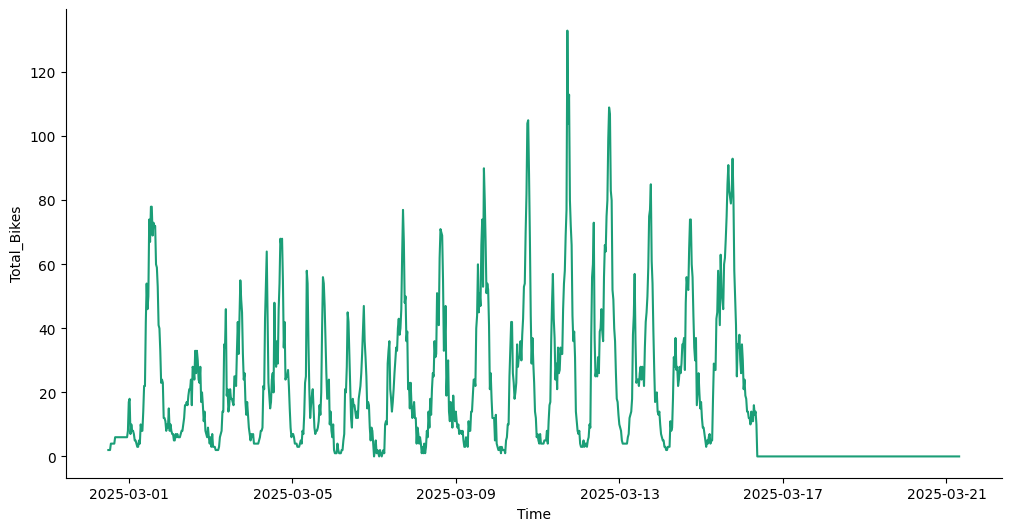

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Total_Bikes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usable_df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Total_Bikes')

Now that the data is finally ready, lets study a little of it.

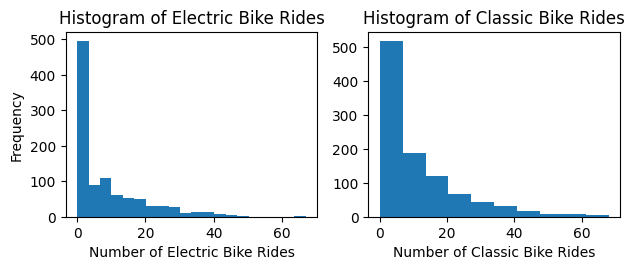

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(usable_df['Eletrics'], bins=20)
plt.title('Histogram of Electric Bike Rides')
plt.xlabel('Number of Electric Bike Rides')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(usable_df['Classics'], bins=10)
plt.title('Histogram of Classic Bike Rides')
plt.xlabel('Number of Classic Bike Rides')


plt.tight_layout()
plt.show()

<ipython-input-23-1e986bb76c49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usable_df['Total_Bikes'] = usable_df['Eletrics'] + usable_df['Classics']


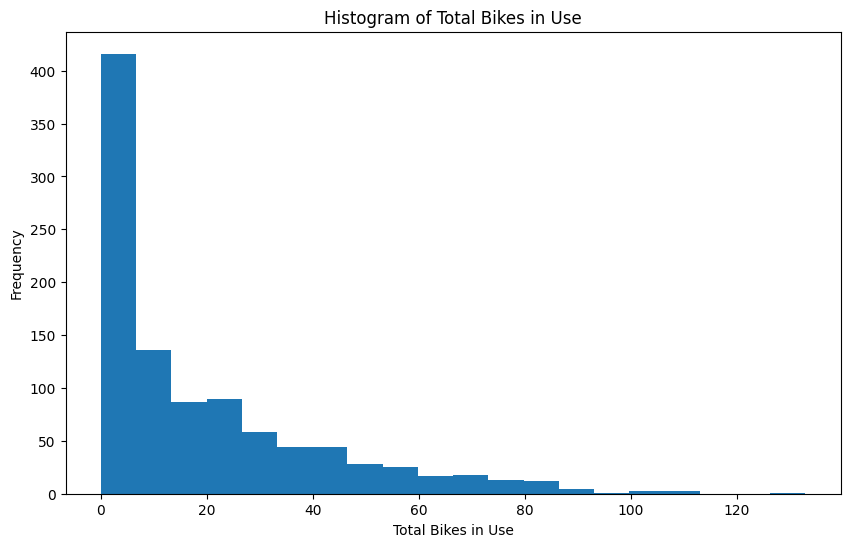

In [ ]:
usable_df['Total_Bikes'] = usable_df['Eletrics'] + usable_df['Classics']

plt.figure(figsize=(10, 6))
plt.hist(usable_df['Total_Bikes'], bins=20)
plt.title('Histogram of Total Bikes in Use')
plt.xlabel('Total Bikes in Use')
plt.ylabel('Frequency')
plt.show()


# Simulation



> Now to the final question a simulation



In [ ]:
mean_bikes, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(usable_df['Total_Bikes'], replace=True, size=100)
    sample_mean = np.mean(temp_sample)
    mean_bikes.append(sample_mean)


boot_mean = np.mean(mean_bikes)
boot_95_ci = np.percentile(mean_bikes, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))


Bootstrapped Mean Length = 18.99749, 95% CI = [14.59    23.29025]


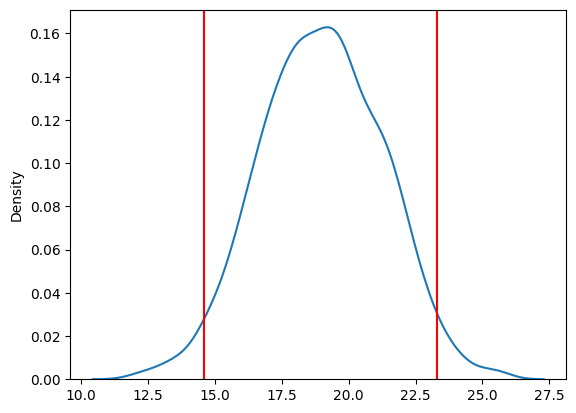

In [ ]:
sns.kdeplot(mean_bikes)
for endpoint in boot_95_ci:
    plt.axvline(endpoint, color='red')